In [26]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.optim import Optimizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


In [28]:
torch.manual_seed(42)

In [29]:
train_df = pd.read_csv("D:\\Work\wsl\\ML-DS\\fashion-mnist\\fashion-mnist_train.csv")#.head(5000)
test_df = pd.read_csv("D:\\Work\wsl\\ML-DS\\fashion-mnist\\fashion-mnist_test.csv")#.head(1000)

In [30]:
print("train_df.count:",train_df.count())
print("test_df.count:", test_df.count())

train_df.count: label       60000
pixel1      60000
pixel2      60000
pixel3      60000
pixel4      60000
            ...  
pixel780    60000
pixel781    60000
pixel782    60000
pixel783    60000
pixel784    60000
Length: 785, dtype: int64
test_df.count: label       10000
pixel1      10000
pixel2      10000
pixel3      10000
pixel4      10000
            ...  
pixel780    10000
pixel781    10000
pixel782    10000
pixel783    10000
pixel784    10000
Length: 785, dtype: int64


In [31]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Converting to Numpy
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training set
X_test_scaled = scaler.transform(X_test) 

In [35]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32).to(device=device)
        self.labels = torch.tensor(labels, dtype=torch.long).to(device=device)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [36]:
train_dataset = CustomDataset(X_train_scaled, y_train)
test_dataset = CustomDataset(X_test_scaled, y_test)

In [37]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
num_cls = len(np.unique(y_train))

Batch 1:
  Images shape: torch.Size([32, 784])
  Labels shape: torch.Size([32])
  Labels: tensor([4, 9, 0, 5, 5, 3, 7, 5, 2, 8], device='cuda:0')


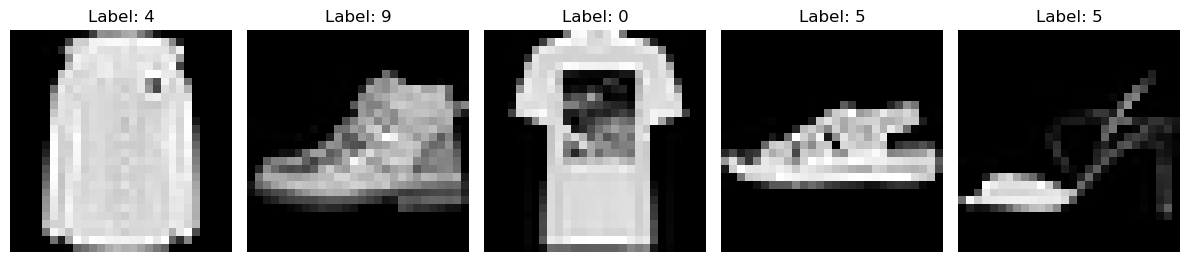

In [38]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"  Images shape: {images.shape}")
    print(f"  Labels shape: {labels.shape}")
    print(f"  Labels: {labels[:10]}")
    
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i in range(5):
        # Reshape and plot each image
        img_2d = images[i].cpu().numpy().reshape(28, 28)
        axes[i].imshow(img_2d, cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
    break  # Only show first batch


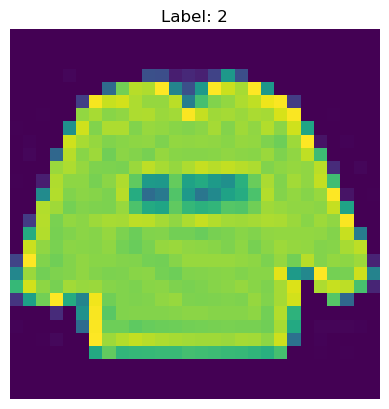

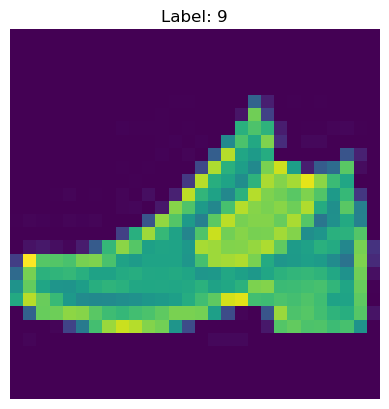

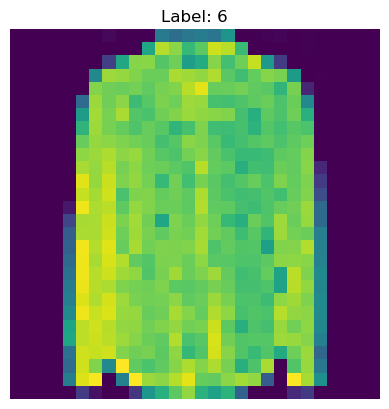

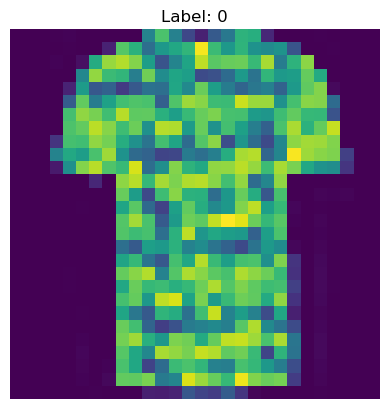

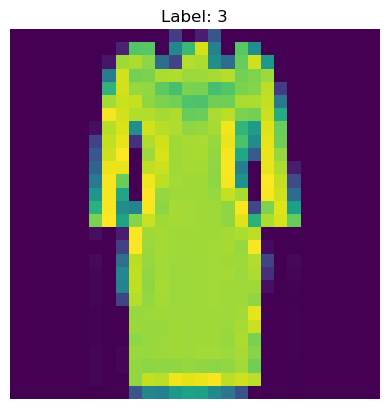

In [39]:
# Show the first 5 images in test_df
for i in range(5):
    img = train_df.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img)#, cmap='gray')
    plt.title(f"Label: {train_df.iloc[i, 0]}")
    plt.axis('off')
    plt.show()

In [40]:
class MyANN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.num_features = num_features
        print(num_features)
        self.model = nn.Sequential(nn.Linear(num_features, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, 64),
                                   nn.ReLU(),   
                                   nn.Linear(64, num_cls)
                                   )
    def forward(self, x) :
        return self.model(x)

In [41]:
model = MyANN(num_features=X_train.shape[1]).to(device=device)

784


In [42]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate) 
#optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [43]:
epochs = 100

for epoch in range(epochs):

    total_epoch_loss = 0

    for batch_features, batch_lables in train_loader:
   
        outputs= model(batch_features)

        loss = criterion(outputs, batch_lables)
        
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 0.5281672671318054
Epoch: 2 , Loss: 0.38180004384120303
Epoch: 3 , Loss: 0.3461851755440235
Epoch: 4 , Loss: 0.3169108342806498
Epoch: 5 , Loss: 0.30025812593698503
Epoch: 6 , Loss: 0.28733467914760114
Epoch: 7 , Loss: 0.2736401346961657
Epoch: 8 , Loss: 0.26279879919290544
Epoch: 9 , Loss: 0.2509805487841368
Epoch: 10 , Loss: 0.24496085386176905
Epoch: 11 , Loss: 0.2330142635633548
Epoch: 12 , Loss: 0.22694011564354102
Epoch: 13 , Loss: 0.22299010718663534
Epoch: 14 , Loss: 0.21428215327709912
Epoch: 15 , Loss: 0.2096520976126194
Epoch: 16 , Loss: 0.20528786159902812
Epoch: 17 , Loss: 0.19618595061351857
Epoch: 18 , Loss: 0.19333774570251505
Epoch: 19 , Loss: 0.18749465254098177
Epoch: 20 , Loss: 0.18024373531192542
Epoch: 21 , Loss: 0.17931402473300695
Epoch: 22 , Loss: 0.17431852988948424
Epoch: 23 , Loss: 0.170314718345056
Epoch: 24 , Loss: 0.16467594530135393
Epoch: 25 , Loss: 0.16234355689957738
Epoch: 26 , Loss: 0.1596620148892204
Epoch: 27 , Loss: 0.15273187373

In [44]:
model.eval()
total = 0
correct = 0

for batch_features, batch_lables in test_loader:
    outputs = model(batch_features)
    _, pred = torch.max(outputs, 1)
    total += batch_lables.shape[0]
    correct += (pred == batch_lables).sum().item()

print("Total:", total)
print("Corrected:", correct)
print("Accuracy:", (correct/total) * 100)

Total: 10000
Corrected: 8909
Accuracy: 89.09
